# PyPlot Examples
by [Gizmaa](https://github.com/gizmaa/Julia_Examples)<br>
Last Edited: May 13, 2019<br>
Latest [PyPlot_Examples.zip](https://github.com/gizmaa/Julia_Examples/blob/master/PyPlot_Examples.zip)

##### Contents

<ul>
    <li><a href="#translating">Translating</a></li>
    <li><a href="#importantnotes">Important Note</a></li>
    <li><a href="#basicplots">Basic Plot</a></li>
    <li><a href="#plotannotation">Plot Annotation</a></li>
    <li><a href="#customtime">Time Customization</a></li>
    <li><a href="#subplots">Subplots</a></li>
    <li><a href="#polarplot">Polar Plot</a></li>
    <li><a href="#histogram">Histogram</a></li>
    <li><a href="#barplot">Bar Plot</a></li>
    <li><a href="#errorbar">Error Bars</a></li>
    <li><a href="#inexactplot">Inexact Plot</a></li>
    <li><a href="#piechart">Pie Chart</a></li>
    <li><a href="#scatterplot">Scatter Plot</a></li>
    <li><a href="#boxplot">Box Plot</a></li>
    <li><a href="#majorminorticks">Major-Minor Ticks</a></li>
    <li><a href="#multiaxis">Mult-axis Plot</a></li>
    <li><a href="#axisplacement">Axis Placement</a></li>
    <li><a href="#surfacecontour">Surface and Contour Plots</a></li>
    <li><a href="#linecollection">Line Collection</a></li>
    <li><a href="#brokenAxisSubplot">Broken Axis Subplot</a></li>
</ul>

### PyPlot
#### Translating<a name="translating"></a>
 
Translating PyPlot code from Python to Julia can be difficult so here are a few examples comparing Python code with its Julia equivalent.

In [ ]:
# Python
ax.set_ylim([-30, 10])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

Source: [Axis Boundary Color](http://matplotlib.org/examples/showcase/xkcd.html)

In [ ]:
# Julia
ax.set_ylim([-30,10])
ax.spines["top"].set_color("none") # Remove the top axis boundary
ax.spines["right"].set_color("none") # Remove the right axis boundary

The above example looked at settings of plot components. The next example will call matplotlib itself.

In [ ]:
# Python
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
majorformatter = DateFormatter("%d.%m.%Y")
minorformatter = DateFormatter("%H:%M")
majorlocator = DayLocator(interval=1)
minorlocator = HourLocator(byhour=(8,16)) # Not sure about this one

Source: Modified from [this forum post by Nat Wilson](https://groups.google.com/d/msg/julia-users/jIyyRJc6Hho/mSwSCItH3PoJ) and [this matplotlib example](http://matplotlib.org/examples/pylab_examples/date_demo2.html).

In [ ]:
# Julia
majorformatter = matplotlib.dates.DateFormatter("%d.%m.%Y")
minorformatter = matplotlib.dates.DateFormatter("%H:%M")
majorlocator = matplotlib.dates.DayLocator(interval=1)
minorlocator = matplotlib.dates.HourLocator(byhour=(8, 16))

# After an axis exists
ax1.xaxis.set_major_formatter(majorformatter)
ax1.xaxis.set_minor_formatter(minorformatter)
ax1.xaxis.set_major_locator(majorlocator)
ax1.xaxis.set_minor_locator(minorlocator)

<hr>

#### Important Note<a name="importantnotes"></a>
The easiest way of doing a quick plot is to simply type it into the REPL (command line) but by default interactive mode might be "off". This means that when you create a figure, `figure()`, nothing will appear except for the object type in the REPL, `PyPlot.Figure(PyObject ....` The command `plt[:show]()` will make the figure visible but also make the REPL temporarily unusable until all figures are closed.

Changing interactive mode to "on" is as simple as running `ion()`. Plots will be visible and the REPL will still be usable. It will only last for the current session though. Add it to the .juliarc.jl file to make it "on" by default. It can also be turned "off" by running `ioff()`. If IJulia fails to plot inline try adding `gcf()` after the plot.

Depending on the editor you are using this may be undesirable. In one mode IJulia may plot inline whereas the other may plot to a window.

<hr>

#### Basic Plot<a name="basicplots"></a>
Most of the basic commands in PyPlot are very similar to Matlab. 

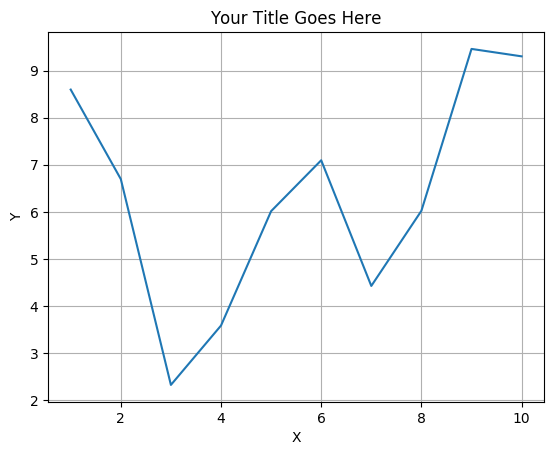

In [2]:
using PyPlot
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
x = collect(1:10)
y = 10rand(10,1)

p = plot(x,y)
xlabel("X")
ylabel("Y")
PyPlot.title("Your Title Goes Here")
grid("on")
gcf() # Needed by IJulia to display plot

The first noticable change is in the plotting command when non-default values are used. 

In [ ]:
p = plot_date(x,y,linestyle="-",marker="None",label="Base Plot") # Basic line plot

Instead of `"linestyle","-"` it uses `linestyle="-"` for parameters. 

<hr>

## Plot Annotation<a name="plotannotation"></a>
([IJulia](pyplot_annotation.ipynb), [Code](pyplot_annotation.jl))

![Annotation Examples](pyplot_annotation.png)

The following command will point an arrow at a point and label the arrow.

In [ ]:
annotate("Look, data!",
    xy=[x;y,# Arrow tip
    xytext=[x+dx;y+dy], # Text offset from tip
    xycoords="data", # Coordinates in in "data" units
    arrowprops=["facecolor"=>"black"]) # Julia dictionary objects are automatically converted to Python object when they pass into a PyPlot function

It's important to note that in Python the arrowprops would look like this: `arrowprops=dict(arrowstyle="->")`. Dictionary definitions look like `arrowprops=["facecolor"=>"black"]` in Julia.

LaTeX can be used by putting an L in front of LaTeX code, `L"$\int x = \frac{x^2}{2} + C$"`.

In [ ]:
annotate(L"$\int x = \frac{x^2}{2} + C$",
    xy=[1;0],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")

<hr>

## Time Customization<a name="customtime"></a>
([IJulia](pyplot_customtime.ipynb),[Code](pyplot_customtime.jl))

The formatting preparation is accomplished by calling the formatters within Matplotlib.

In [ ]:
majorformatter = matplotlib.dates.DateFormatter("%d.%m.%Y")
minorformatter = matplotlib.dates.DateFormatter("%H:%M")
majorlocator = matplotlib.dates.DayLocator(interval=1)
minorlocator = matplotlib.dates.HourLocator(byhour=(8, 16))

They are then applied to the specific axis, the handle of which is called ax1 in this case.

In [ ]:
ax1.xaxis.set_major_formatter(majorformatter)
ax1.xaxis.set_minor_formatter(minorformatter)
ax1.xaxis.set_major_locator(majorlocator)
ax1.xaxis.set_minor_locator(minorlocator)

![Custom Time](pyplot_customtime.png)

<hr>

## Subplots<a name="subplots"></a>
([IJulia](pyplot_subplot.ipynb), [Code](pyplot_subplot.jl))

`subplot(YXN)`, Y = number of columns, X = number of rows, N = number of axis being created

The number, N, of a grid of axes starts in the upper left (1), and goes right then down. The second axis of a 2x2 grid is the upper right axis.

In [ ]:
subplot(313) # Create the third plot of a 3x1 group of subplots

suptitle("3x1 Subplot") # Supe title, title for all subplots combined

![2x2 Subplot](pyplot_subplot_mixed.png)

![3x1 Subplot](pyplot_subplot_column.png)

![3x1 Touching Subplots](pyplot_subplot_touching.png)

<hr>

## Polar and Windrose Plot<a name="polarplot"></a>
([IJulia](pyplot_windrose.ipynb), [Code](pyplot_windrose.jl))

In [ ]:
ax = axes(polar="true") # Create a polar axis
# Do your plotting

# Optional changes
ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure, required when doing additional modifications

![Wind Rose](pyplot_windrose_barplot.png)

![Wind Rose - Line](pyplot_windrose_lineplot.png)

<hr>

## Histogram<a name="histogram"></a>
([IJulia](pyplot_histogram.ipynb), [Code](pyplot_histogram.jl))

In [ ]:
h = plt.hist(x,nbins) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

The PyPlot.plt prefix is required to disambiguate it from the hist command.

![Histogram](pyplot_histogram.png)

<hr>

## Bar Plot<a name="barplot"></a>
([IJulia](pyplot_barplot.ipynb), [Code](pyplot_barplot.jl))

In [ ]:
b = bar(x,y,color="#0f87bf",align="center",alpha=0.4)

In [ ]:
b = barh(x,y,color="#0f87bf",align="center",alpha=0.4)

![Bar Plots](pyplot_barplot.png)

<hr>

## Errorbar Plot<a name="errorbar"></a>
([IJulia](pyplot_errorbar.ipynb), [Code](pyplot_errorbar.jl))

In [ ]:
errorbar(x, # Original x data points, N values
    y, # Original y data points, N values
    yerr=errs, # Plus/minus error ranges, Nx2 values
    fmt="o") # Format

![Error Bars](pyplot_errorbar.png)

<hr>

## Inexact Plot<a name="inexactplot"></a>
([IJulia](pyplot_inexact.ipynb), [Code](pyplot_inexact.jl))

The IJulia example does not properly apply all the formatting as the terminal version does.

In [ ]:
xkcd() # Set to XKCD mode, based on the comic (hand drawn)
# Plot everything

![Inexact Plot](pyplot_inexact.png)

<hr>

## Pie Chart<a name="piechart"></a>
([IJulia](pyplot_piechart.ipynb), [Code](pyplot_piechart.jl))

In [ ]:
p = pie(sizes,
    labels=labels,
    shadow=true,
    startangle=90,
    explode=explode,
    colors=colors,
    autopct="%1.1f%%")

![Pie Chart](pyplot_piechart.png)

<hr>

## Scatter Plot<a name="scatterplot"></a>
([IJulia](pyplot_scatterplot.ipynb), [Code](pyplot_scatterplot.jl))

In [ ]:
scatter(x,y,s=areas,alpha=0.5)

![Scatter Plot](pyplot_scatterplot.png)

<hr>

## Box Plot<a name="boxplot"></a>
([IJulia](pyplot_boxplot.ipynb), [Code](pyplot_boxplot.jl))

In [ ]:
boxplot(data, # Each column/cell is one box
    notch=true, # Notched center
    whis=0.75, # Whisker length as a percent of inner quartile range
    widths=0.25, # Width of boxes
    vert=false, # Horizontal boxes
    sym="rs") # Symbol color and shape (rs = red square)

![Box Plot](pyplot_boxplot.png)

<hr>

## Major and Minor Ticks<a name="majorminorticks"></a>
([IJulia](pyplot_majorminor.ipynb), [Code](pyplot_majorminor.jl))

In [ ]:
###########################
#  Set the tick interval  #
###########################
Mx = matplotlib.ticker.MultipleLocator(20) # Define interval of major ticks
f = matplotlib.ticker.FormatStrFormatter("%1.2f") # Define format of tick labels
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
ax.xaxis.set_major_formatter(f) # Set format of tick labels

mx = matplotlib.ticker.MultipleLocator(5) # Define interval of minor ticks
ax.xaxis.set_minor_locator(mx) # Set interval of minor ticks

My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks

my = matplotlib.ticker.MultipleLocator(0.1) # Define interval of minor ticks
ax.yaxis.set_minor_locator(my) # Set interval of minor ticks

#########################
#  Set tick dimensions  #
#########################
ax.xaxis.set_tick_params(which="major",length=10,width=2)
ax.xaxis.set_tick_params(which="minor",length=5,width=2)

fig.canvas.draw() # Update the figure

![Major and Minor Ticks](pyplot_majorminor.png)

<hr>

## Multi-axis Plot<a name="multiaxis"></a>
([IJulia](pyplot_multiaxis.ipynb), [Code](pyplot_multiaxis.jl))

In [ ]:
################
#  Other Axes  #
################
new_position = [0.06;0.06;0.77;0.91] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"purple")
ylabel("Right Axis",fontdict=font2)
p = plot(x,y2,color="purple",linestyle="-",marker="o",label="Second") # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="purple") # Y Axis font formatting

ax3 = ax.twinx() # Create another axis on top of the current axis
ax3.spines["right"].set_position(("axes",1.12)) # Offset the y-axis label from the axis itself so it doesn't overlap the second axis
font3 = Dict("color"=>"green")
ylabel("Far Right Axis",fontdict=font3)
p = plot(x,y3,color="green",linestyle="-",marker="o",label="Third") # Plot a basic line
ax3.set_position(new_position) # Position Method 2
setp(ax.get_yticklabels(),color="green") # Y Axis font formatting

axis("tight")

# Enable just the right part of the frame
ax3.set_frame_on(true) # Make the entire frame visible
ax3.patch.set_visible(false) # Make the patch (background) invisible so it doesn't cover up the other axes' plots
ax3.spines["top"].set_visible(false) # Hide the top edge of the axis
ax3.spines["bottom"].set_visible(false) # Hide the bottom edge of the axis

fig.canvas.draw() # Update the figure

![Multi-axis Plot](pyplot_multiaxis.png)

<hr>

## Axis Placement<a name="axisplacement"></a>
([IJulia](pyplot_axis_placement.ipynb), [Code](pyplot_axis_placement.jl))

In [ ]:
ax.spines["top"].set_visible(false) # Hide the top edge of the axis
ax.spines["right"].set_visible(false) # Hide the right edge of the axis
ax.spines["left"].set_position("center") # Move the right axis to the center
ax.spines["bottom"].set_position("center") # Most the bottom axis to the center
ax.xaxis.set_ticks_position("bottom") # Set the x-ticks to only the bottom
ax.yaxis.set_ticks_position("left") # Set the y-ticks to only the left

In [ ]:
ax2.spines["top"].set_visible(false) # Hide the top edge of the axis
ax2.spines["right"].set_visible(false) # Hide the right edge of the axis
ax2.xaxis.set_ticks_position("bottom")
ax2.yaxis.set_ticks_position("left")
ax2.spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
ax2.spines["bottom"].set_position(("axes",-0.05)) # Offset the bottom scale from the axis

![Axis Placement](pyplot_axis_placement.png)

<hr>

## Surface and Contour Plots<a name="surfacecontour"></a>
([IJulia](pyplot_surfaceplot.ipynb), [Code](pyplot_surfaceplot.jl))

Thanks to [Daniel Høegh](https://gist.github.com/dhoegh) for providing this example.

In [ ]:
plot_surface(xgrid, ygrid, z, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)

In [ ]:
contour(xgrid, ygrid, z, colors="black", linewidth=2.0)

![Surface and Contour Plots](pyplot_surfaceplot.png)

<hr>

## Broken Axis Subplot<a name="brokenAxisSubplot"></a>
([IJulia](pyplot_brokenAxisSubplot.ipynb), [Code](pyplot_brokenAxisSubplot.jl))

Thanks to [Ian Butterworth](https://gist.github.com/ianshmean) for providing this example.

In [ ]:
axes_grid1 = pyimport("mpl_toolkits.axes_grid1")

In [ ]:
divider = axes_grid1.make_axes_locatable(ax)
ax2 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax2)

In [ ]:
ax.spines["top"].set_visible(false)

In [ ]:
ax2.spines["bottom"].set_visible(false)

In [ ]:
# Upper Line Break Markings
d = 0.015  # how big to make the diagonal lines in axes coordinates
ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color="k", clip_on=false,linewidth=0.8)        # Left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), transform=ax2.transAxes, color="k", clip_on=false,linewidth=0.8)  # Right diagonal

# Lower Line Break Markings
ax.plot((-d, +d), (1 - d, 1 + d), transform=ax.transAxes, color="k", clip_on=false,linewidth=0.8)  # Left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), transform=ax.transAxes, color="k", clip_on=false,linewidth=0.8)  # Right diagonal

![Broken Axis Subplot](pyplot_brokenAxisSubplot.png)